In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import adam_v2 #Adam
from keras.utils.np_utils import to_categorical #one hot encoding
import random
from keras.models import Model
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D

In [2]:
np.random.seed(0)
(X_train,y_train),(X_test,y_test)=mnist.load_data()
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
#if the condition is met program runs smoothly else it will assert
assert(X_train.shape[0]==y_train.shape[0]),"No of images in the train set and the label doen't match"
assert(X_test.shape[0]==y_test.shape[0]),"No of images in the test set and the label doen't match"
assert(X_train.shape[1:]==(28,28)),"Dimensions are not same"
assert(X_test.shape[1:]==(28,28)),"Dimensions are not same"

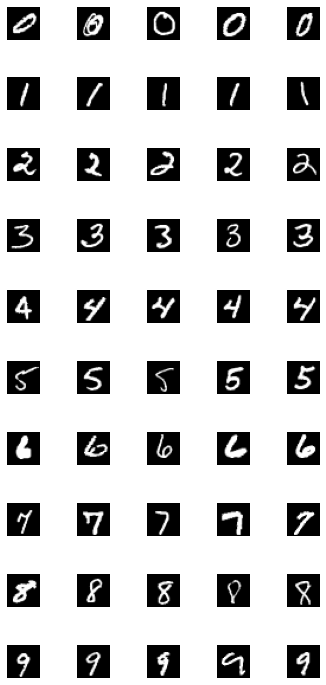

In [6]:
num_classes=10
cols=5
fig,axs=plt.subplots(nrows=num_classes,ncols=cols,figsize=(5,10))
fig.tight_layout()
for i in range(cols): #5 i=0 1
    for j in range(num_classes):#10  j=0,j=1,.... j=9
        x_selected=X_train[y_train==j]
        axs[j][i].imshow(x_selected[random.randint(0,len(x_selected)-1),:,:],cmap="gray")
        axs[j][i].axis("off")

In [7]:
y_train=to_categorical(y_train,num_classes) #one hot encoding
y_test=to_categorical(y_test,num_classes)
X_train=X_train/255
X_test=X_test/255

In [8]:
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

In [9]:
def leNet_model():
    model=Sequential()
    model.add(Conv2D(30,(5,5),input_shape=(28,28,1),activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(15,(3,3),activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(500,activation="relu"))
    model.add(Dense(10,activation="softmax"))
    optimizer=adam_v2.Adam(learning_rate=0.01)
    model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])
    return model

In [10]:
model=leNet_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 15)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 375)               0         
                                                                 
 dense (Dense)               (None, 500)               1

In [11]:
history=model.fit(X_train,y_train,epochs=10,validation_split=0.1,verbose=1,shuffle=1,batch_size=400)

Epoch 1/10
135/135 [==============================] - 21s 150ms/step - loss: 0.1874 - accuracy: 0.9391 - val_loss: 0.0434 - val_accuracy: 0.9873
Epoch 2/10
135/135 [==============================] - 18s 135ms/step - loss: 0.0473 - accuracy: 0.9848 - val_loss: 0.0430 - val_accuracy: 0.9883
Epoch 3/10
135/135 [==============================] - 16s 121ms/step - loss: 0.0347 - accuracy: 0.9890 - val_loss: 0.0406 - val_accuracy: 0.9883
Epoch 4/10
135/135 [==============================] - 15s 114ms/step - loss: 0.0288 - accuracy: 0.9907 - val_loss: 0.0418 - val_accuracy: 0.9875
Epoch 5/10
135/135 [==============================] - 14s 107ms/step - loss: 0.0265 - accuracy: 0.9913 - val_loss: 0.0450 - val_accuracy: 0.9875
Epoch 6/10
135/135 [==============================] - 15s 112ms/step - loss: 0.0245 - accuracy: 0.9919 - val_loss: 0.0491 - val_accuracy: 0.9875
Epoch 7/10
135/135 [==============================] - 15s 112ms/step - loss: 0.0205 - accuracy: 0.9935 - val_loss: 0.0431 - val_ac

Text(0.5, 1.0, 'Loss')

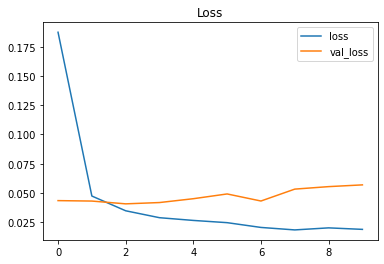

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title("Loss")

Text(0.5, 1.0, 'Accuracy')

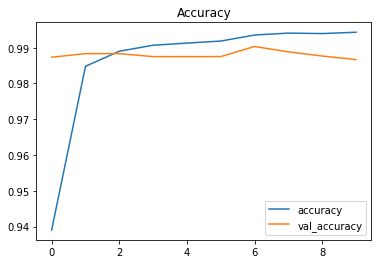

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.title("Accuracy")

<Response [200]>


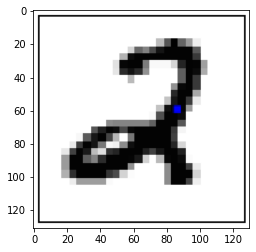

In [17]:
from PIL import Image
import requests
url="https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png"
response=requests.get(url,stream=True)
print(response)
img=Image.open(response.raw)
plt.imshow(img)

(131, 130, 3)
(28, 28, 3)
(28, 28)


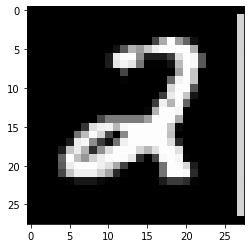

In [18]:
#prepocessing the image
import cv2
img_array=np.asarray(img)
print(img_array.shape)
resized=cv2.resize(img_array,(28,28))
print(resized.shape)
gray_scale=cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)
print(gray_scale.shape)
image=cv2.bitwise_not(gray_scale)
plt.imshow(image,cmap="gray")

In [19]:
image=image/255
image=image.reshape(1,28,28,1)
prediction=model.predict(image)
class_name=np.argmax(prediction)
print(class_name)

2


In [20]:
score=model.evaluate(X_test,y_test)
print(type(score))
print("Score",score[0])
print("Accuracy",score[1])

313/313 [==============================] - 3s 8ms/step - loss: 0.0592 - accuracy: 0.9853
<class 'list'>
Score 0.05922620743513107
Accuracy 0.9853000044822693
